In [4]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import importlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
os.chdir("C:\\Users\\cseve\\Google Drive\\Doutorado\\Projetos de Pesquisa\\SolarEnergyForecasting\\Codigos")

In [ ]:
sondapd = pd.read_csv("DataSets/SONDA_BSB.csv", sep=";")

years = sondapd.year.unique()
days = sondapd.day.unique()

data = []

for year in years:
    for day in days:
        tmp = sondapd[(sondapd.year == year) & (sondapd.day == day)].dropna()
        
        for minute in np.arange(0,24*60,step=15):
            inst = []
            
            radiance = np.nanmean( tmp[(tmp["min"] - (tmp["min"] % 15)) == minute]["glo_avg"]  )
            inst.append(  datetime.datetime(year, 1, 1) + datetime.timedelta(int(day) - 1, minutes=int(minute)) )
            
            inst.append(radiance)
            data.append(inst)

nov = pd.DataFrame(data,columns=["data","glo_avg"])

C:\Users\cseve\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
C:\Users\cseve\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
C:\Users\cseve\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
C:\Users\cseve\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
C:\Users\cseve\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
C:\Users\cseve\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
C:\Users\c

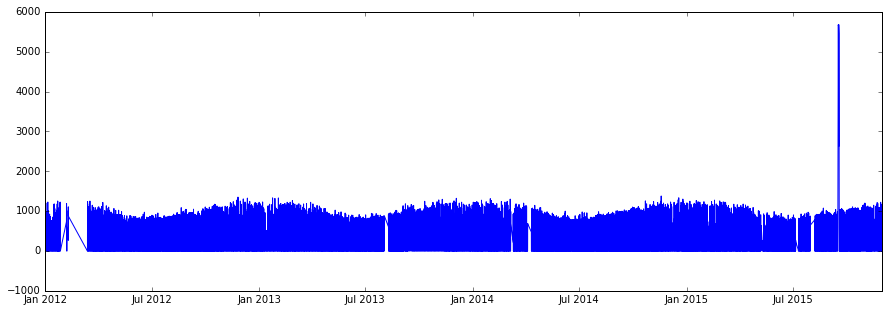

In [42]:
sonda = pd.read_csv("DataSets/SONDA_BSB_15MIN_AVG.csv", sep=";").dropna()

sonda['data'] = pd.to_datetime(sonda['data'])

sonda.index = pd.DatetimeIndex(sonda.data)

fig = plt.figure(figsize=[15,5])
plt.plot(sonda['glo_avg'])
#plt.axvline(1051200,c="black")

#cUtil.showAndSaveImage(fig,"pictures/sonda",False)



In [47]:
sonda_monthly = pd.DataFrame()
sonda_monthly['glo_avg'] = sonda.glo_avg.resample('M').sum()
sonda_monthly

,glo_avg
2012-01-31,469871.712167
2012-02-29,50579.775407
2012-03-31,404682.859764
2012-04-30,654531.884000
2012-05-31,532220.493038
2012-06-30,579209.287041
2012-07-31,644806.671667
2012-08-31,691241.130000
2012-09-30,702060.831333
2012-10-31,762581.971455


C:\Users\cseve\Anaconda3\lib\site-packages\statsmodels\tsa\filters\filtertools.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return np.r_[[np.nan] * head, x, [np.nan] * tail]


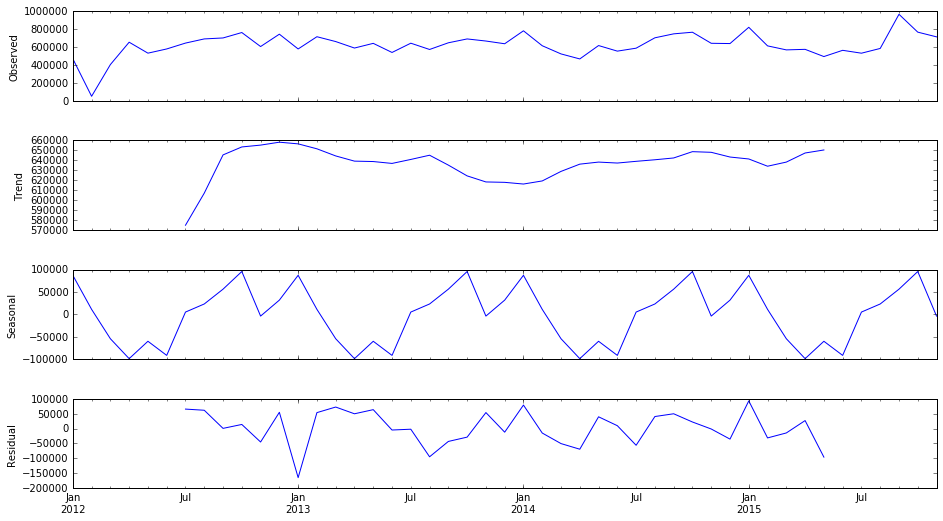

In [49]:
decomposition = seasonal_decompose(sonda_monthly.glo_avg, freq=12)
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

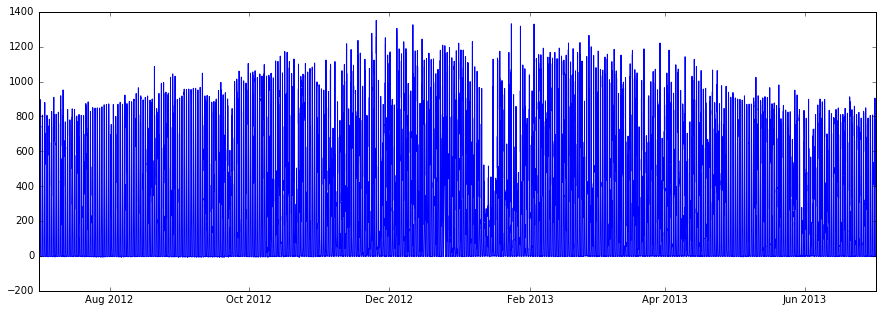

In [44]:
sonda_test = sonda['2012-07-01':'2013-07-01']
fig = plt.figure(figsize=[15,5])
plt.plot(sonda_test['glo_avg'])

In [50]:
decomposition = seasonal_decompose(sonda_test.glo_avg, freq=96)
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

ValueError: Inferred frequency of index and frequency don't match. This function does not re-sample

In [40]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

C:\Users\cseve\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
C:\Users\cseve\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()


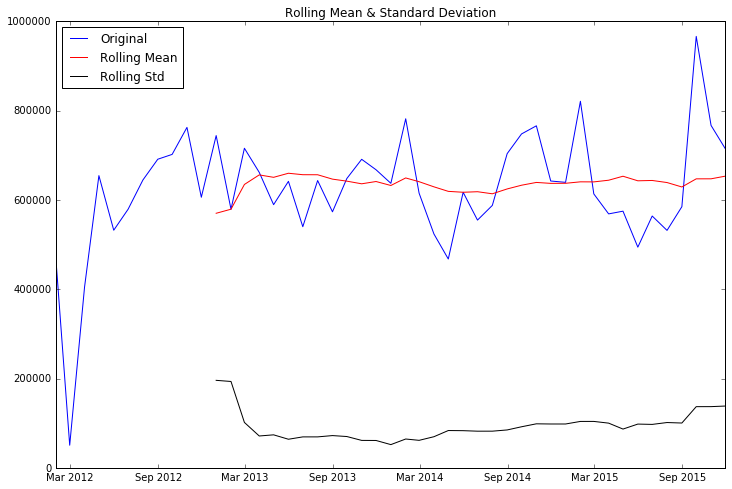

Results of Dickey-Fuller Test:
Test Statistic                 -4.556328
p-value                         0.000155
#Lags Used                      8.000000
Number of Observations Used    38.000000
Critical Value (1%)            -3.615509
Critical Value (10%)           -2.609200
Critical Value (5%)            -2.941262
dtype: float64


In [51]:
test_stationarity(sonda_monthly.glo_avg)